# Cuaderno de Ejercicios: Integración de Técnicas No Supervisadas y Modelos Supervisados

En este cuaderno se abordan dos enfoques:

1. **Segmentación con Clustering antes de Predecir:**
   - Se segmenta un dataset de regresión utilizando clustering y se entrena un modelo supervisado para cada segmento.

2. **Reducción de Dimensionalidad con PCA antes de Aplicar un Modelo Supervisado:**
   - Se utiliza PCA para reducir la dimensionalidad de un dataset de clasificación y se entrena un modelo supervisado sobre los datos transformados.

¡Resuelve los ejercicios completando las celdas indicadas y responde las preguntas de reflexión!

## Sección 1: Clustering para Segmentación antes de Predecir

**Objetivo:**

Segmentar un dataset de regresión en grupos homogéneos y entrenar un modelo supervisado (por ejemplo, regresión lineal) para cada cluster.

### Ejercicio

1. **Carga y Preparación de Datos:**
   - Cargar o generar un dataset que contenga variables predictoras y una variable objetivo.
   - Estandarizar las variables predictoras.

2. **Aplicación de Clustering:**
   - Aplicar un algoritmo de clustering (por ejemplo, *k-means*) para segmentar los datos.
   - Determinar el número de clusters (puedes explorar el método del codo o el silhouette score).

3. **Entrenamiento de Modelos Supervisados por Cluster:**
   - Para cada cluster, separar los datos y entrenar un modelo supervisado (por ejemplo, regresión lineal).
   - Calcular una métrica de rendimiento (por ejemplo, MSE) para evaluar cada modelo.

4. **Predicción para Nuevos Datos:**
   - Dada una nueva muestra, asignarla al cluster correspondiente y usar el modelo específico para predecir el valor objetivo.

### Pista de Código

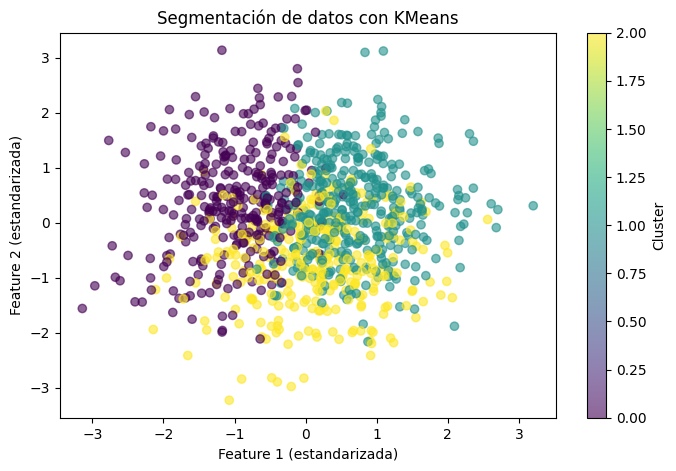

Cluster 0: 304 muestras, MSE = 99.60
Cluster 1: 378 muestras, MSE = 106.18
Cluster 2: 318 muestras, MSE = 111.79
La nueva muestra pertenece al cluster: 2
Predicción del valor objetivo para la nueva muestra: -26.39


c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [4]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. Cargar o generar el dataset
# Escribe aquí el código para cargar o generar el dataset
# Por ejemplo, puedes usar make_regression o leer un archivo CSV
X, y = make_regression(n_samples=1000, n_features=5, noise=10, random_state=42)
data = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(X.shape[1])])
data['Target'] = y



# 2. Estandarizar las variables predictoras
# Escribe aquí el código para escalar los datos (por ejemplo, usando StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop('Target', axis=1))
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.3, random_state=42)




# 3. Aplicar clustering
# - Seleccionar el número de clusters y aplicar KMeans
# - Visualizar los clusters (por ejemplo, usando las dos primeras dimensiones)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data['Cluster'], cmap='viridis', alpha=0.6)
plt.title("Segmentación de datos con KMeans")
plt.xlabel("Feature 1 (estandarizada)")
plt.ylabel("Feature 2 (estandarizada)")
plt.colorbar(label='Cluster')
plt.show()

# 4. Entrenar un modelo supervisado para cada cluster
# - Para cada cluster, separa el subconjunto de datos y entrena un modelo (por ejemplo, LinearRegression)
# - Calcula y muestra la métrica de rendimiento (MSE) para cada cluster
models = {}
mse_scores = {}

for cluster in range(n_clusters):
    # Filtramos el subset de datos correspondiente al cluster
    subset = data[data['Cluster'] == cluster]
    X_cluster = subset.drop(['Target', 'Cluster'], axis=1)
    y_cluster = subset['Target']
    
    # Entrenamos el modelo
    model = LinearRegression()
    model.fit(X_cluster, y_cluster)
    
    # Predicción y cálculo de MSE
    y_pred = model.predict(X_cluster)
    mse = mean_squared_error(y_cluster, y_pred)
    mse_scores[cluster] = mse
    
    # Guardamos el modelo para usarlo luego
    models[cluster] = model
    
    print(f"Cluster {cluster}: {len(subset)} muestras, MSE = {mse:.2f}")
# 5. Predicción para una nueva muestra
# - Dada una nueva muestra, escálala, asigna el cluster y predice el valor objetivo usando el modelo correspondiente
nueva_muestra = np.array([[0.5, -1.2, 0.3, 0.8, -0.5]])

nueva_muestra_scaled = scaler.transform(nueva_muestra)


# Asignamos el cluster correspondiente a la nueva muestra
cluster_nueva = kmeans.predict(nueva_muestra_scaled)[0]
print(f"La nueva muestra pertenece al cluster: {cluster_nueva}")

# Usamos el modelo supervisado específico para ese cluster para predecir el valor objetivo
# Nota: Como el modelo fue entrenado con los datos sin escalado (originales),
# usamos la nueva muestra en formato original
prediccion = models[cluster_nueva].predict(nueva_muestra)
print(f"Predicción del valor objetivo para la nueva muestra: {prediccion[0]:.2f}")

> **Preguntas para Reflexión:**
>
> - ¿Cómo influye la elección del número de clusters en el rendimiento del modelo?
> - ¿Qué ventajas y desventajas encuentras en entrenar modelos separados por segmento?

## Sección 2: PCA para Reducción de Dimensionalidad antes de Aplicar un Modelo Supervisado

**Objetivo:**

Aplicar PCA para reducir la dimensionalidad de un dataset de clasificación y, a continuación, entrenar un modelo supervisado (por ejemplo, SVM).

### Ejercicio

1. **Carga y Preparación de Datos:**
   - Cargar o generar un dataset de clasificación (por ejemplo, usando *make_classification* o un dataset real).
   - Dividir el dataset en conjunto de entrenamiento y prueba y escalar los datos.

2. **Aplicación de PCA:**
   - Aplicar PCA para reducir la dimensionalidad del dataset.
   - Determinar el número de componentes a retener (por ejemplo, para conservar el 95% de la varianza).

3. **Entrenamiento del Modelo Supervisado:**
   - Entrenar un clasificador (por ejemplo, SVM) con los datos transformados.
   - Evaluar el rendimiento del modelo en el conjunto de prueba (por ejemplo, utilizando accuracy).

4. **Predicción para Nuevos Datos:**
   - Transformar una nueva muestra (escalado y PCA) y predecir su clase usando el modelo entrenado.

### Pista de Código

Dimensiones del dataset original: (1000, 20)
Dimensiones originales: 20  -> Dimensiones tras PCA: 13


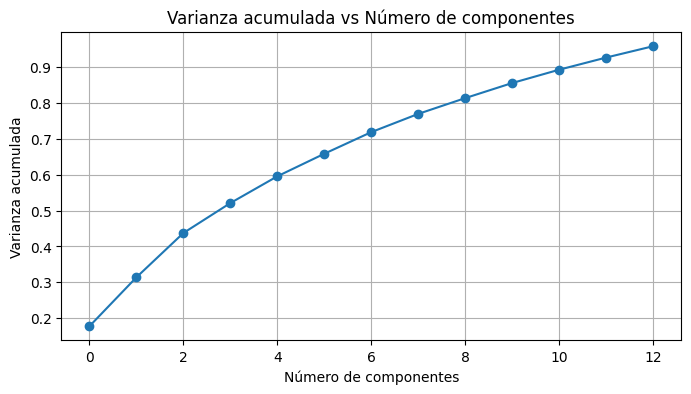

Accuracy del modelo SVM tras PCA: 0.93
Nueva muestra (original): [[0.27454995 0.52297993 0.61183214 0.58964616 0.2613844  0.60309431
  0.79202161 0.91237666 0.83617237 0.56345635 0.42640071 0.20729422
  0.90372052 0.05358212 0.80622412 0.43599102 0.71712764 0.30649651
  0.14246418 0.94003216]]
Predicción de la clase para la nueva muestra: 0


In [5]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Cargar o generar el dataset de clasificación
# Generamos un dataset sintético con 1000 muestras y 20 características
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
                           n_redundant=5, random_state=42)
print("Dimensiones del dataset original:", X.shape)

# 2. Dividir en conjunto de entrenamiento y prueba, y escalar los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Aplicar PCA
# Ajustar PCA en el conjunto de entrenamiento para conservar el 95% de la varianza
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Dimensiones originales:", X_train_scaled.shape[1],
      " -> Dimensiones tras PCA:", X_train_pca.shape[1])

# Opcional: Visualizar la varianza explicada por cada componente
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.title('Varianza acumulada vs Número de componentes')
plt.grid(True)
plt.show()

# 4. Entrenar un modelo supervisado (SVM) con los datos transformados
svm_model = SVC(random_state=42)
svm_model.fit(X_train_pca, y_train)

# Evaluar el rendimiento del modelo en el conjunto de prueba
y_pred = svm_model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo SVM tras PCA: {accuracy:.2f}")

# 5. Predicción para una nueva muestra
# - Se genera una nueva muestra aleatoria con 20 características (mismo número que el dataset original)
nueva_muestra = np.random.rand(1, X.shape[1])
print("Nueva muestra (original):", nueva_muestra)

# Escalar la nueva muestra con el mismo escalador
nueva_muestra_scaled = scaler.transform(nueva_muestra)

# Transformar la nueva muestra con el PCA ya ajustado
nueva_muestra_pca = pca.transform(nueva_muestra_scaled)

# Predecir la clase de la nueva muestra utilizando el modelo entrenado
prediccion_nueva = svm_model.predict(nueva_muestra_pca)
print("Predicción de la clase para la nueva muestra:", prediccion_nueva[0])


> **Preguntas para Reflexión:**
>
> - ¿Qué efecto tiene la reducción de dimensionalidad en el tiempo de entrenamiento y en el rendimiento del modelo?
> - ¿Cómo afecta la elección del porcentaje de varianza a retener en la precisión del clasificador?

## Conclusiones

- Compara ambos enfoques y discute en qué situaciones puede ser más ventajoso cada uno.
- Reflexiona sobre la integración de técnicas no supervisadas y supervisadas en un pipeline de machine learning.

¡Buena suerte y a programar!